In [33]:
%load_ext autoreload
%autoreload 2
from copy import copy, deepcopy
from collections import defaultdict
from random import sample, randint
from busca.classes import ALTURAS, COLUNAS
from busca.classes.gerente import GerenteRemocao
from busca.classes.patio import Container, Pilha, Patio

from busca.utils import gera_agendamento_containers, gera_containers_transito
from busca.utils.simulador import Simulador


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
results = defaultdict(dict)
for perc in [.1, .7]:
    simulador = Simulador()
    simulador.generate_env()
    for mode_out in ['nenhum', 'ordered', 'stay']:
        for mode_in in ['like', 'nenhum']:
            sub_results = defaultdict(list)
            for turns in [10]:
                for tamanho_fila in [10, 20, 30, 40, 50]:
                    lsimulador = deepcopy(simulador)
                    lsimulador.initialize_gerente(mode=mode_in)
                    lsimulador.turns = turns
                    lsimulador.tamanho_fila = tamanho_fila
                    media = lsimulador.run_monte_carlo(mode_in=mode_in)
                    sub_results[mode_in].append((turns, tamanho_fila, media))
        results[perc][mode_out] = sub_results

Modo like
Média de remoções: 0.05
Total gatein: 100 gateout:100
Modo like
Média de remoções: 0.12105263157894737
Total gatein: 178 gateout:178
Modo like
Média de remoções: 0.25952380952380955
Total gatein: 293 gateout:293
Modo like
Média de remoções: 0.08814102564102563
Total gatein: 397 gateout:397
Modo like
Média de remoções: 0.08341437444543034
Total gatein: 491 gateout:491
Modo nenhum
Média de remoções: 0.0
Total gatein: 99 gateout:99
Modo nenhum
Média de remoções: 0.0
Total gatein: 199 gateout:199
Modo nenhum
Média de remoções: 0.01
Total gatein: 234 gateout:234
Modo nenhum
Média de remoções: 0.015256410256410257
Total gatein: 314 gateout:314
Modo nenhum
Média de remoções: 0.10171428571428572
Total gatein: 444 gateout:444
Modo like
Média de remoções: 0.0
Total gatein: 90 gateout:90
Modo like
Média de remoções: 0.0
Total gatein: 194 gateout:194
Modo like
Média de remoções: 0.11333333333333333
Total gatein: 292 gateout:292
Modo like
Média de remoções: 0.005
Total gatein: 356 gateout

In [54]:
print(results)

defaultdict(<class 'dict'>, {0.1: {'nenhum': defaultdict(<class 'list'>, {'nenhum': [(10, 10, 0.0), (10, 20, 0.0), (10, 30, 0.01), (10, 40, 0.015256410256410257), (10, 50, 0.10171428571428572)]}), 'ordered': defaultdict(<class 'list'>, {'nenhum': [(10, 10, 0.0), (10, 20, 0.025), (10, 30, 0.06666666666666667), (10, 40, 0.0), (10, 50, 0.0875)]}), 'stay': defaultdict(<class 'list'>, {'nenhum': [(10, 10, 0.0), (10, 20, 0.02), (10, 30, 0.1454022988505747), (10, 40, 0.11897435897435897), (10, 50, 0.11432653061224489)]})}, 0.7: {'nenhum': defaultdict(<class 'list'>, {'nenhum': [(10, 10, 0.0), (10, 20, 0.031578947368421054), (10, 30, 0.0), (10, 40, 0.0), (10, 50, 0.05)]}), 'ordered': defaultdict(<class 'list'>, {'nenhum': [(10, 10, 0.0), (10, 20, 0.0), (10, 30, 0.08), (10, 40, 0.24049450549450552), (10, 50, 0.08652962634329095)]}), 'stay': defaultdict(<class 'list'>, {'nenhum': [(10, 10, 0.0), (10, 20, 0.0), (10, 30, 0.013333333333333332), (10, 40, 0.09826923076923078), (10, 50, 0.056408163265

0.1 nenhum
[0.0, 0.0, 0.01, 0.015256410256410257, 0.10171428571428572]


ValueError: x and y must have same first dimension, but have shapes (0,) and (5,)

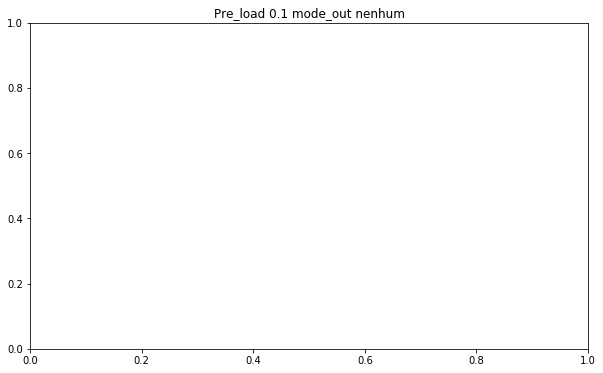

In [55]:
for perc, values in results.items():
    for mode_out, sub_results in values.items():
        print(perc, mode_out)
        y_none = [x[2] for x in sub_results['nenhum']]
        y_like = [x[2] for x in sub_results['like']]
        x = [x[1] for x in sub_results['like']]
        fig = plt.figure(figsize=(10, 6))
        plt.title('Pre_load %s mode_out %s' % (perc, mode_out))
        plt.plot(x, y_none, label='None %s' % mode_out)
        plt.plot(x, y_like, label='like %s' % mode_out)
        plt.legend()
        plt.ylabel('Media Remocoes')
        plt.xlabel('Tamanho da fila utilizada')